<a href="https://colab.research.google.com/github/Jorgellamocca/-AIFS-weather-forecast-/blob/main/gefs_tmin35dias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies required for this example.
# If you're not using pip to install depdencies (for example, you're using conda or uv),
# skip this cell and and install using the package manager of your choice.
# Restart the notebook after installing dependencies.
%pip install "xarray[complete]>=2025.1.2" "zarr>=3.0.4" requests aiohttp
!apt-get install -y libproj-dev proj-data proj-bin libgeos-dev
!pip install cython
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.9/203.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.3/147.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 1.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Don

<ipython-input-2-b1b323b7fc0c>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds_meta = xr.open_zarr("https://data.dynamical.org/noaa/gefs/forecast-35-day/latest.zarr", consolidated=True)
<ipython-input-2-b1b323b7fc0c>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds_meta = xr.open_zarr("https://data.dynamical.org/noaa/gefs/forecast-35-day/latest.zarr", consolidated=True)
<ipython-input-2-b1b323b7fc0c>:14: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_zarr("https://data.dynamical.org/noaa/gefs/forecast-35-day/lat

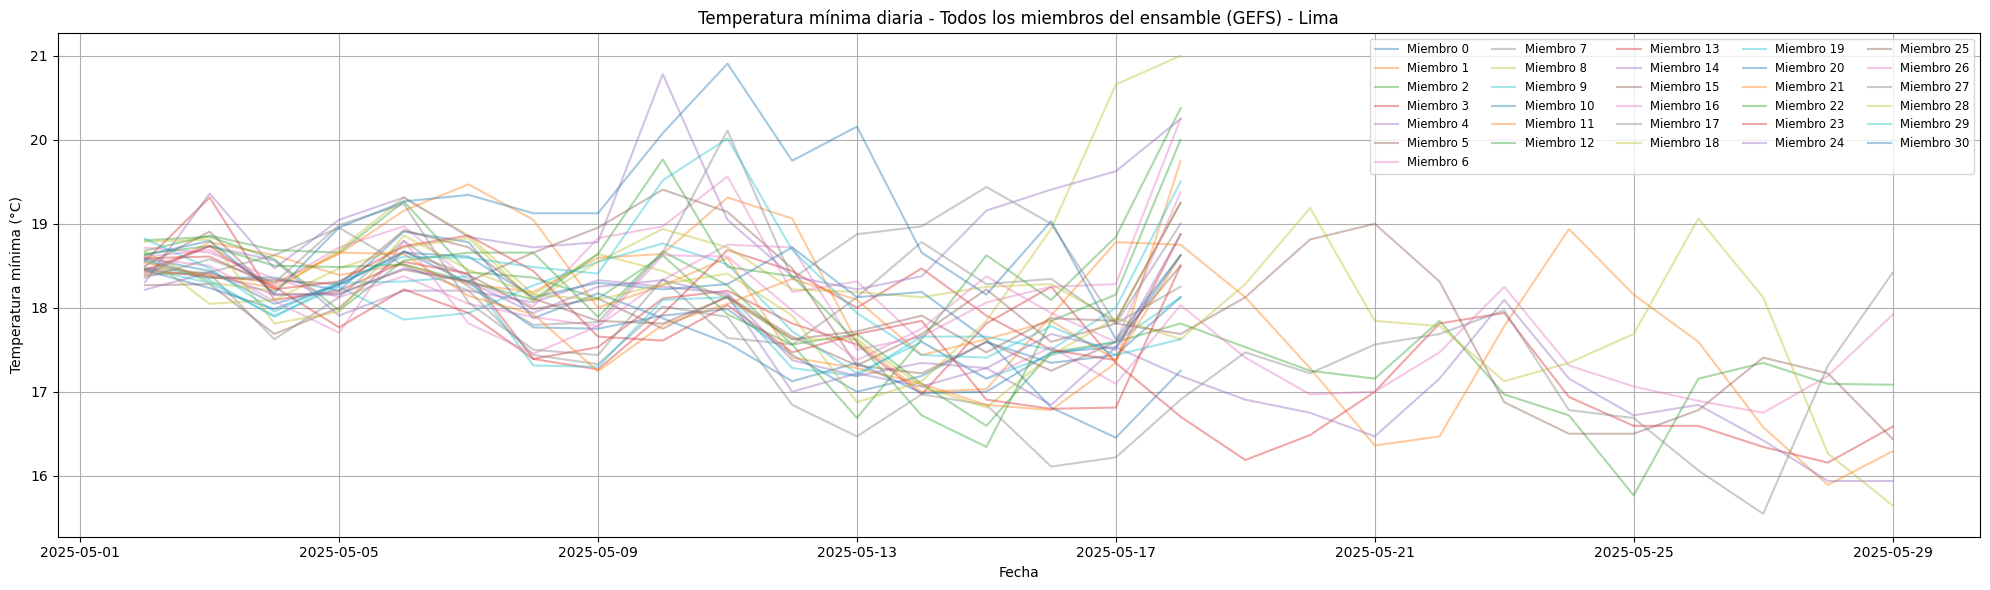

In [ ]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Coordenadas de Lima
lat_lima = -12.046
lon_lima = -77.042

# Abrir metadatos para detectar el último init_time
ds_meta = xr.open_zarr("https://data.dynamical.org/noaa/gefs/forecast-35-day/latest.zarr", consolidated=True)
latest_init = ds_meta.init_time.max().values

# Cargar solo la variable de temperatura mínima
ds = xr.open_zarr("https://data.dynamical.org/noaa/gefs/forecast-35-day/latest.zarr", consolidated=True)
ds = ds["minimum_temperature_2m"]

# Seleccionar coordenada y init_time más reciente (sin promediar el ensamble)
ds_sel = ds.sel(init_time=latest_init, latitude=lat_lima, longitude=lon_lima, method="nearest")

# Agregar coordenada forecast_time
forecast_time = ds_sel.init_time + ds_sel.lead_time
ds_sel = ds_sel.assign_coords(forecast_time=forecast_time).swap_dims({"lead_time": "forecast_time"})

# Agrupar por día para cada miembro
tmin_daily = ds_sel.groupby("forecast_time.date").mean("forecast_time")
dates = pd.to_datetime(tmin_daily.date.values)

# Crear gráfico
plt.figure(figsize=(20, 6))
for member in ds_sel.ensemble_member.values:
    member_data = ds_sel.sel(ensemble_member=member)
    member_daily = member_data.groupby("forecast_time.date").mean("forecast_time")
    plt.plot(dates, member_daily, alpha=0.4, label=f"Miembro {member}")

# Formato
plt.title("Temperatura mínima diaria - Todos los miembros del ensamble (GEFS) - Lima")
plt.xlabel("Fecha")
plt.ylabel("Temperatura mínima (°C)")
plt.grid(True)
plt.tight_layout()
plt.legend(ncol=5, fontsize="small", loc='upper right')
plt.show()


<ipython-input-4-605acd8002af>:11: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds_meta = xr.open_zarr("https://data.dynamical.org/noaa/gefs/forecast-35-day/latest.zarr", consolidated=True)
<ipython-input-4-605acd8002af>:11: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds_meta = xr.open_zarr("https://data.dynamical.org/noaa/gefs/forecast-35-day/latest.zarr", consolidated=True)
<ipython-input-4-605acd8002af>:15: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_zarr("https://data.dynamical.org/noaa/gefs/forecast-35-day/lat

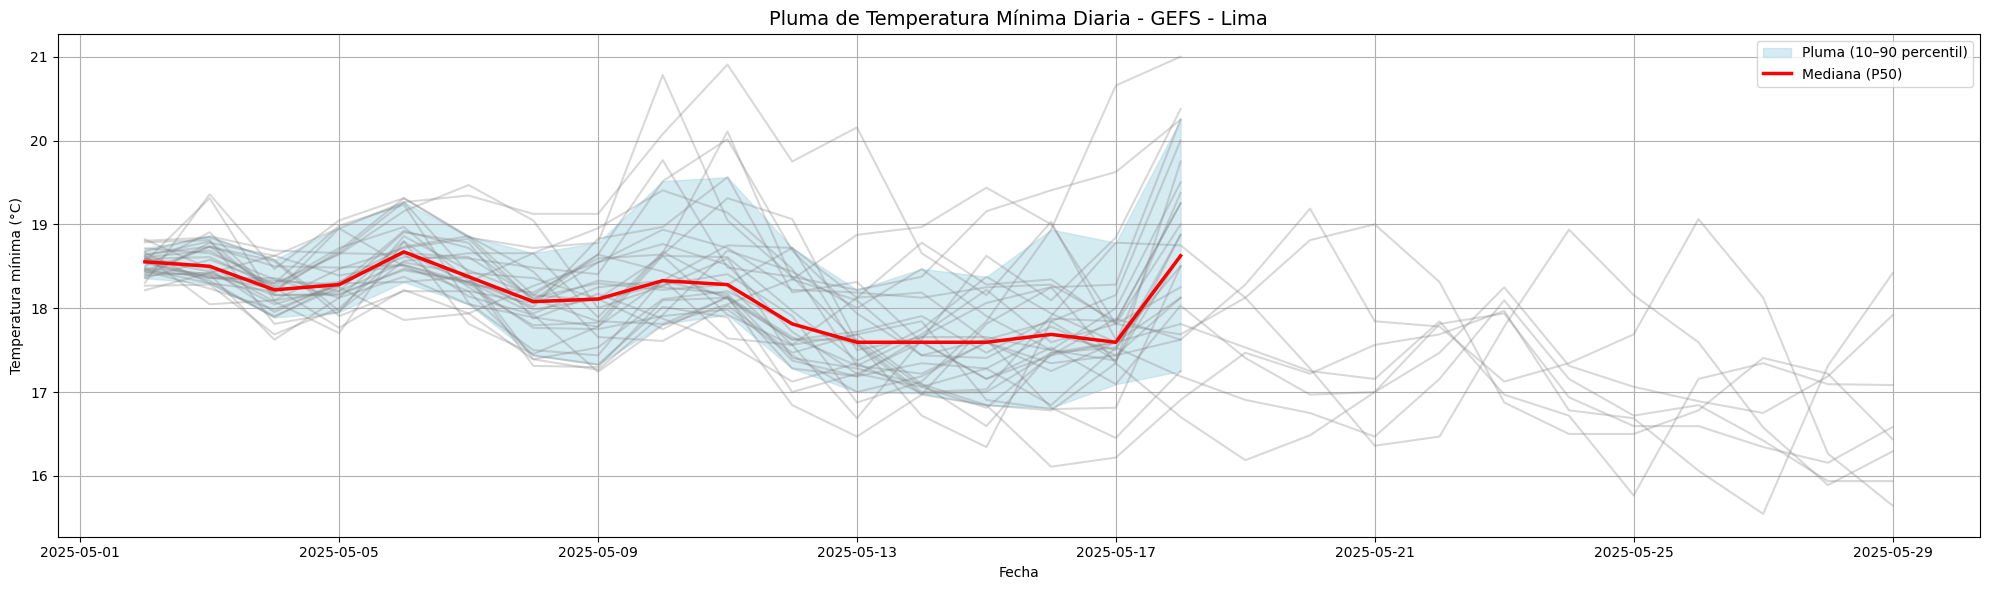

In [4]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Coordenadas de Lima
lat_lima = -12.046
lon_lima = -77.042

# Abrir metadatos para detectar el último init_time
ds_meta = xr.open_zarr("https://data.dynamical.org/noaa/gefs/forecast-35-day/latest.zarr", consolidated=True)
latest_init = ds_meta.init_time.max().values

# Cargar variable
ds = xr.open_zarr("https://data.dynamical.org/noaa/gefs/forecast-35-day/latest.zarr", consolidated=True)
ds = ds["minimum_temperature_2m"]

# Seleccionar punto, sin promediar miembros
ds_sel = ds.sel(init_time=latest_init, latitude=lat_lima, longitude=lon_lima, method="nearest")

# Crear coordenada forecast_time
forecast_time = ds_sel.init_time + ds_sel.lead_time
ds_sel = ds_sel.assign_coords(forecast_time=forecast_time).swap_dims({"lead_time": "forecast_time"})

# Agrupar por día para cada miembro
tmin_daily = ds_sel.groupby("forecast_time.date").mean("forecast_time")
dates = pd.to_datetime(tmin_daily.date.values)

# Calcular percentiles sobre miembros para cada día
p10 = np.percentile(tmin_daily, 10, axis=0)
p50 = np.percentile(tmin_daily, 50, axis=0)
p90 = np.percentile(tmin_daily, 90, axis=0)

# Gráfico
plt.figure(figsize=(20, 6))

# Todos los miembros en gris claro
for member in ds_sel.ensemble_member.values:
    member_data = ds_sel.sel(ensemble_member=member)
    member_daily = member_data.groupby("forecast_time.date").mean("forecast_time")
    plt.plot(dates, member_daily, color='gray', alpha=0.3)

# Sombra entre p10 y p90 (pluma)
plt.fill_between(dates, p10, p90, color='lightblue', alpha=0.5, label='Pluma (10–90 percentil)')

# Mediana (línea central)
plt.plot(dates, p50, color='red', linewidth=2.5, label='Mediana (P50)')

# Formato
plt.title("Pluma de Temperatura Mínima Diaria - GEFS - Lima", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Temperatura mínima (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
